### 1. IMPORT CENSUS DATA

In [7]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = '../../Data/CH_CSV/'

names=["ausgaenge.csv" , "dienstleistungen.csv", "etappen.csv", "fahrzeuge.csv", "haushalte.csv", "haushaltspersonen.csv", 
       "reisenmueb.csv", "segmente.csv", "tagesreisen.csv", "verifikationspunkte.csv", "wege.csv", "wegeinland.csv", 
       "zielpersonen.csv"]

DATA = [pd.read_csv(DATA_FOLDER+e, encoding='ISO-8859-1') for e in names]

In [8]:
OUTPUT= DATA[0]
SERVICES = DATA[1]
STAGES = DATA[2] 
VEHICLES = DATA[3]
HOUSEHOLDS = DATA[4]
HOUSEHOLDERS= DATA[5]
TRAVEL_MUST= DATA[6]
SEGMENTS= DATA[7]
DAY_TRIPS= DATA[8]
VERIFICATION_POINTS= DATA[9]
WAYS= DATA[10]
WAY_IN_LAND= DATA[11]
TARGET_PERSONS= DATA[12]

In [9]:
HOUSEHOLDERS

,HHNR,WM,HPNR,alter,gesl,f20400a,f20400b
0,100004,0.781952,1,50,2,1,1
1,100004,0.781952,2,18,2,2,2
2,100004,0.781952,3,17,1,-99,-99
3,100010,0.394216,1,8,2,-99,-99
4,100010,0.394216,2,40,2,1,2
...,...,...,...,...,...,...,...
163838,499995,0.616858,1,48,1,1,1
163839,499995,0.616858,2,17,1,-99,-99
163840,499996,2.901484,1,68,2,1,2
163841,499998,0.836014,1,63,1,1,2


In [10]:
count = HOUSEHOLDERS.groupby("HHNR")["HPNR"].agg(['count'])
count.sort_values("count", ascending=False)

,count
HHNR,
373986,17
425514,14
436254,13
217273,13
168559,12
...,...
213380,1
411315,1
213377,1


In [11]:
merge = pd.merge(HOUSEHOLDS, count, left_on='HHNR', right_on='HHNR', how='left')
merge.to_csv('..\Data\CH_CSV\merge.csv', sep=',')
merge.count

<bound method DataFrame.count of          HHNR        WM  DMOD   intwdate  sprache    ZEIT_HH      W_X  \
0      100004  0.781952     2  1/29/2015        1  11.733333  8.16896   
1      100010  0.394216     2  5/31/2015        3   4.966667  9.04765   
2      100021  0.548396     2  2/22/2015        1   3.116667  9.53818   
3      100028  0.930521     2  4/14/2015        2   7.983333  6.74936   
4      100037  1.337850     4  2/22/2015        2  10.150000  6.16624   
...       ...       ...   ...        ...      ...        ...      ...   
57085  499969  0.162240     2   2/1/2016        2   6.600000  6.14285   
57086  499994  0.185661     2  1/19/2016        1   6.083333  8.31741   
57087  499995  0.616858     1   2/6/2016        3   3.750000  6.11938   
57088  499996  2.901484     1  1/25/2016        1   4.233333  8.57306   
57089  499998  0.836014     3  1/18/2016        1   6.133333  8.73096   

            W_Y  W_X_CH1903  W_Y_CH1903  ...  f80211f  f80211g  f80300  \
0      47.44724 

In [12]:
merge['count'].sort_values

<bound method Series.sort_values of 0        3
1        2
2        2
3        2
4        4
        ..
57085    5
57086    5
57087    2
57088    1
57089    2
Name: count, Length: 57090, dtype: int64>

<AxesSubplot:>

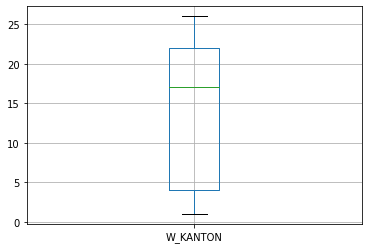

In [13]:
HOUSEHOLDS.boxplot(column=['W_KANTON'])
#DATA = [pd.read_csv(DATA_FOLDER+e, encoding='ISO-8859-1') for e in range (len(HOUSEHOLDS["W_KANTON"]))]

In [8]:
TARGET_PERSONS

,"HHNR,""WP"",""alter"",""proxi"",""sprache"",""dmod"",""zeit_zp"",""BTag"",""USTag"",""VSTag"",""tag"",""f20400a"",""f20400b"",""f20400c"",""f20400d"",""f40200_01"",""f40202"",""f40203"",""f40300"",""f40400_01a"",""f40400_01b"",""f40400_01c"",""f40400_01d"",""f40400_01e"",""f40400_01f"",""f40400_01g"",""f40402a"",""f40402b"",""f40402c"",""f40402d"",""f40402e"",""f40402f"",""f40402g"",""f40404a"",""f40404b"",""f40404c"",""f40404d"",""f40404e"",""f40404f"",""f40404g"",""f40500"",""f40600"",""f40700"",""f40701"",""f40702"",""f40800_01"",""f40900"",""f40901_02"",""f40903"",""f40904_05"",""f40906"",""f41000a"",""f41000b"",""f41000c"",""f41001a"",""f41001b"",""f41001c"",""f41100_01"",""f41102"",""f41300"",""f41301"",""f41350"",""f41351"",""f41400"",""f41401"",""f41500"",""f41501"",""f80500"",""f80501"",""f80600_01a"",""f80600_01b"",""f80600_01c"",""f80600_01d"",""Berufstamm"",""f81000"",""f81100"",""f81200"",""f81300"",""f81400"",""f81450"",""f50100a"",""f50100b"",""f50100c"",""f50200"",""f50600a"",""f50600b"",""f50600c"",""f60100"",""f70100"",""f81501"",""f81502"",""f41610a"",""f41610c"",""f41610d"",""f41610f"",""f41610g"",""f41610b"",""f41610e"",""f41651"",""f41653"",""f41654"",""f41700"",""f41800"",""f41900"",""f42000"",""f42100a"",""f42100b"",""f42100c"",""f42100d"",""f42100e"",""f85100a"",""f85100b"",""f85100c"",""f85100d"",""f85101a"",""f85101b"",""f85101c"",""f85201a"",""f85201b"",""f85201c"",""f85201d"",""f85202a"",""f85202b"",""f85202c"",""f85203a"",""f85203b"",""f85203c"",""f85300a"",""f85300b"",""f85300c"",""f85300d"",""f85300e"",""f85401"",""f85402"",""f85403"",""f85404"",""f85411"",""f85412"",""f85413"",""f85414"",""f85501"",""f85502"",""f85503"",""f85504"",""f85600a"",""f85600b"",""f85600c"",""f85600d"",""f85600e"",""f85600f"",""f85600g"",""f85600h"",""f85600i"",""f85600j"",""f85701"",""f85702"",""f85703"",""f85704"",""f85711"",""f85712"",""f85713"",""f85714"",""f85801"",""f85802"",""f85803"",""f85804"",""f43502"",""f43500"",""zivil"",""gesl"",""AMSTAT"",""ESTATUS"",""BSTELL"",""HAUSB"",""HAUSB3"",""ERWERB"",""noga_08"",""wiabt_08"",""SBN2000_1"",""ISCO_08"",""nation"",""rdist_sum"",""rdist_sum_Inland"",""e_dauer_sum"",""e_dauer_sum_Inland"",""T_ETAPPEN"",""T_WEGE"",""T_WEGZEIT"",""T_DISTLV"",""T_DISTMIV"",""T_DISTOEV"",""T_DISTAND"",""T_ARBEIT"",""T_AUSBILDUNG"",""T_EINKAUF"",""T_NUTZ"",""T_FREIZEIT"",""T_BEGLEIT"",""A_X"",""A_Y"",""A_X_CH1903"",""A_Y_CH1903"",""A_QAL"",""A_Ort"",""A_Str"",""A_hnr"",""A_LND"",""A_SPRACHE"",""A_REGION"",""A_KANTON"",""A_BFS"",""A_PLZ"",""A_AGGLO2000"",""A_AGGLO_GROESSE2000"",""A_STRUKTUR_2000"",""A_STRUKTUR_AGG_2000"",""A_struktur_bfs9_2000"",""A_AGGLO2012"",""A_AGGLO_GROESSE2012"",""A_staedt_char_2012"",""A_stat_stadt_2012"",""A_DEGURBA"",""AU_X"",""AU_Y"",""AU_X_CH1903"",""AU_Y_CH1903"",""AU_QAL"",""AU_Ort"",""AU_Str"",""AU_hnr"",""AU_LND"",""AU_SPRACHE"",""AU_REGION"",""AU_KANTON"",""AU_BFS"",""AU_PLZ"",""AU_AGGLO2000"",""AU_AGGLO_GROESSE2000"",""AU_STRUKTUR_2000"",""AU_STRUKTUR_AGG_2000"",""AU_struktur_bfs9_2000"",""AU_AGGLO2012"",""AU_AGGLO_GROESSE2012"",""AU_staedt_char_2012"",""AU_stat_stadt_2012"",""AU_DEGURBA"""
0,"100004,1.48292380449716,50,2,1,2,22.9333333333..."
1,"100010,0.596810691555734,8,2,3,2,11.5833333333..."
2,"100021,0.577779643838785,68,2,1,2,12.716666666..."
3,"100028,0.735754391690886,61,2,2,2,26.366666666..."
4,"100037,1.76919865974747,30,2,2,4,33.5333333333..."
...,...
57085,"499969,0.387162716667309,15,2,2,2,8.566667,""2/..."
57086,"499994,0.510911208085959,10,1,1,2,15.48333,""1/..."
57087,"499995,0.722628509641895,48,2,3,1,10.38333,""2/..."
57088,"499996,1.21875248644512,68,2,1,1,14.23333,""1/2..."
